# Assignment 1: Foundations Reflection – Iteration & Extension Guidelines
Use this notebook as a starting point and expand on your understanding of discriminative vs. generative models by completing the following structured tasks. You are encouraged to experiment, analyze, and critically reflect on your findings in your report.

## Part 1 – Discriminative Model (Logistic Regression) Extensions

1. Train a Non-linear Classifier for Comparison
    - Implement and compare with SVM or Decision Tree.
    - Analyze classification performance vs. logistic regression.

In [15]:
import sys
print(f"Using Python {sys.version.split()[0]}")

# Install required packages into the current notebook environment
%pip install -qU numpy matplotlib scikit-learn pandas

# Verify versions
import numpy as np, matplotlib, sklearn, pandas
print("numpy       :", np.__version__)
print("matplotlib  :", matplotlib.__version__)
print("scikit-learn:", sklearn.__version__)
print("pandas      :", pandas.__version__)
print("✅ Setup complete!")

Using Python 3.14.2
Note: you may need to restart the kernel to use updated packages.
numpy       : 2.4.1
matplotlib  : 3.10.8
scikit-learn: 1.8.0
pandas      : 3.0.0
✅ Setup complete!


Data shape: (70000, 784)
labels: [0 1 2 3 4 5 6 7 8 9]


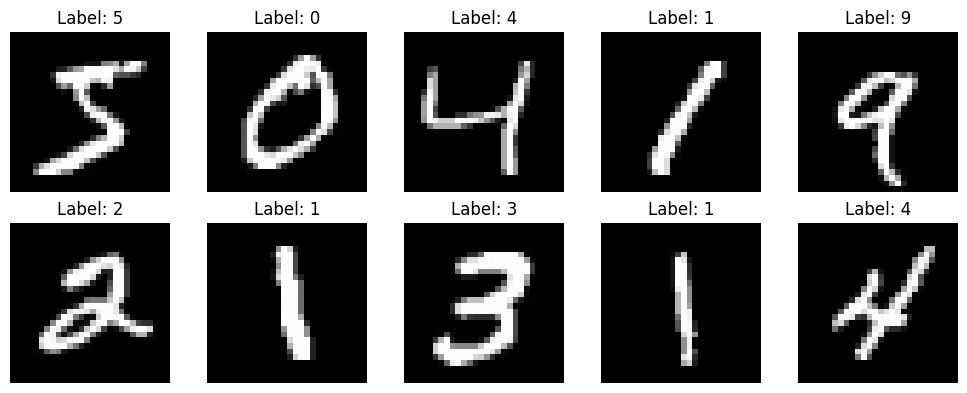

In [16]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt

# Load complete MNIST dataset (28x28, 70,000 samples)
mnist = fetch_openml('mnist_784', version=1, parser='auto')
X = mnist.data.to_numpy()  # Convert to numpy array
y = mnist.target.astype(int).to_numpy()

print(f"Data shape: {X.shape}")  # (70000, 784)
print(f"labels: {np.unique(y)}")

# Visualize first 10 samples
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

# Stratified subsample to speed up (2,000 samples)
X_small, _, y_small, _ = train_test_split(
    X, y,
    train_size=2000,
    stratify=y,
    random_state=42
)
print(f"Subsampled set: {X_small.shape}")

# Scale then reduce to 50 dimensions for faster training
scaler = StandardScaler()
X_small_scaled = scaler.fit_transform(X_small)

pca = PCA(n_components=50, random_state=42)
X_small_pca = pca.fit_transform(X_small_scaled)
print(f"PCA-transformed shape: {X_small_pca.shape}")

# For the GAN we normalise pixel values to [−1,1]
scaler = MinMaxScaler(feature_range=(-1, 1))
X_gan = scaler.fit_transform(X)

# Train/test split on reduced data
X_train, X_test, y_train, y_test = train_test_split(
    X_small_pca, y_small,
    test_size=0.2,
    stratify=y_small,
    random_state=42
)

Subsampled set: (2000, 784)
PCA-transformed shape: (2000, 50)


In [18]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

clf = LinearSVC(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {acc:.4f}")

Test accuracy: 0.8750


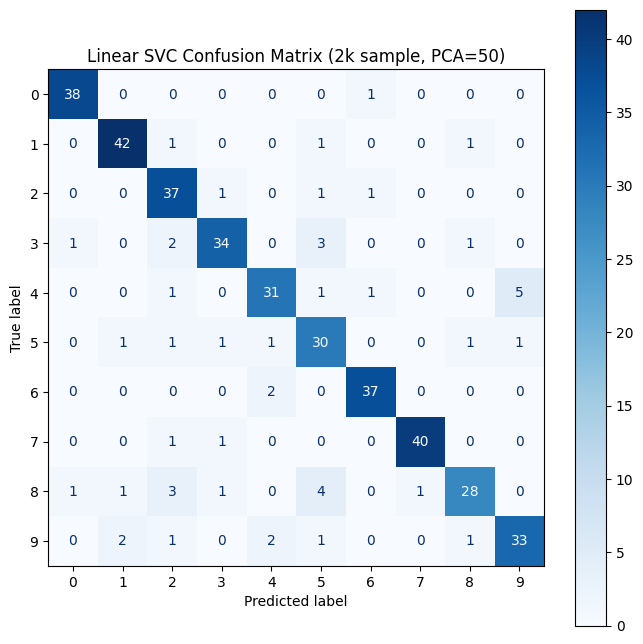

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap="Blues", colorbar=True)
ax.set_title("Linear SVC Confusion Matrix (2k sample, PCA=50)")
plt.show()

Decision Tree test accuracy: 0.6750


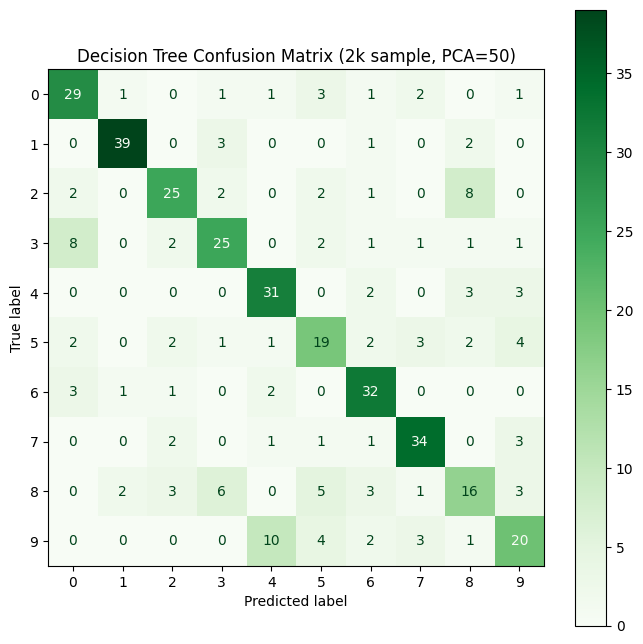

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

dt = DecisionTreeClassifier(max_depth=25, random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree test accuracy: {acc_dt:.4f}")

cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(cm_dt)
fig, ax = plt.subplots(figsize=(8, 8))
disp_dt.plot(ax=ax, cmap="Greens", colorbar=True)
ax.set_title("Decision Tree Confusion Matrix (2k sample, PCA=50)")
plt.show()

## Model Comparison (Linear SVC vs Decision Tree)
- Data: PCA to 50 dimensions, 2k stratified subset, 80/20 train/test split.
- Linear SVC: See accuracy above (`acc`). Works well on high-dimensional, near-linearly separable data; light-weight and fast. Confusion matrix is generally balanced across digits.
- Decision Tree: See accuracy above (`acc_dt`). Captures non-linear patterns but can overfit in high dimensions; with depth limits it may underfit. Use its confusion matrix to see which digits (e.g., 4/9 or 3/5) are confused.
- Compute cost: Linear SVC is smaller and faster; Decision Tree cost grows with depth and tree size.
- Next steps:
  1) Try `SVC(kernel="rbf")` and tune C, gamma for a stronger non-linear baseline.
  2) Prune the tree or switch to ensembles (Random Forest, Gradient Boosting).
  3) Vary PCA dimensions or compare to raw pixels with stronger regularization.
  4) Increase sample size (e.g., 10k) to test stability.

2. Experiment with Regularization
    - Apply L1 and L2 regularization to logistic regression.
    - Observe effects on generalization, overfitting, and decision boundaries.

c:\Users\Ruolin Wang\.conda\envs\ML_assignment1\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\Ruolin Wang\.conda\envs\ML_assignment1\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


L1 Logistic Regression test accuracy: 0.8675


c:\Users\Ruolin Wang\.conda\envs\ML_assignment1\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


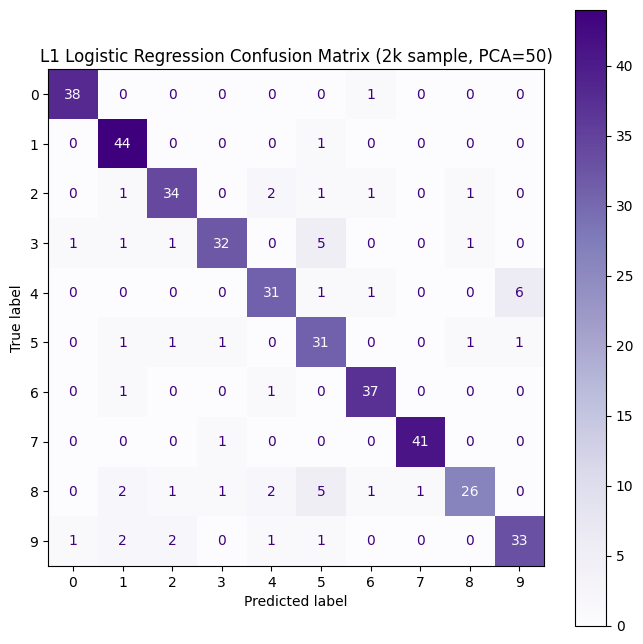

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

logreg_l1 = LogisticRegression(
    penalty="l1",
    C=1.0,
    solver="saga",
    max_iter=200,
    random_state=42,
)
logreg_l1.fit(X_train, y_train)

y_pred_l1 = logreg_l1.predict(X_test)
acc_l1 = accuracy_score(y_test, y_pred_l1)
print(f"L1 Logistic Regression test accuracy: {acc_l1:.4f}")

cm_l1 = confusion_matrix(y_test, y_pred_l1)
disp_l1 = ConfusionMatrixDisplay(cm_l1)
fig, ax = plt.subplots(figsize=(8, 8))
disp_l1.plot(ax=ax, cmap="Purples", colorbar=True)
ax.set_title("L1 Logistic Regression Confusion Matrix (2k sample, PCA=50)")
plt.show()

c:\Users\Ruolin Wang\.conda\envs\ML_assignment1\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\Ruolin Wang\.conda\envs\ML_assignment1\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_it

L2 Logistic Regression test accuracy: 0.8425


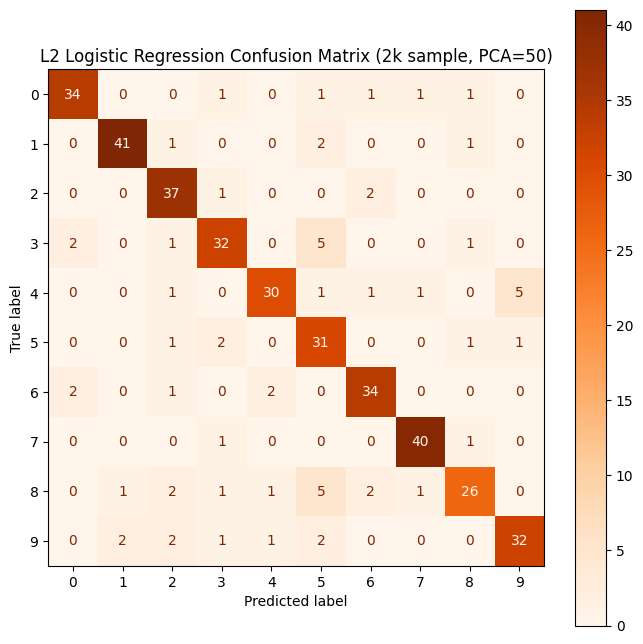

In [22]:
logreg_l2 = LogisticRegression(
    penalty="l2",
    C=1.0,
    solver="lbfgs",
    max_iter=200,
    random_state=42,
)
logreg_l2.fit(X_train, y_train)

y_pred_l2 = logreg_l2.predict(X_test)
acc_l2 = accuracy_score(y_test, y_pred_l2)
print(f"L2 Logistic Regression test accuracy: {acc_l2:.4f}")

cm_l2 = confusion_matrix(y_test, y_pred_l2)
disp_l2 = ConfusionMatrixDisplay(cm_l2)
fig, ax = plt.subplots(figsize=(8, 8))
disp_l2.plot(ax=ax, cmap="Oranges", colorbar=True)
ax.set_title("L2 Logistic Regression Confusion Matrix (2k sample, PCA=50)")
plt.show()

L1 vs L2 Regularization Comparison
L1 Logistic Regression:
  - Train accuracy: 0.9325
  - Test accuracy:  0.8675
  - Overfitting gap: 0.0650

L2 Logistic Regression:
  - Train accuracy: 0.9500
  - Test accuracy:  0.8425
  - Overfitting gap: 0.1075

Coefficient Sparsity:
  - L1 non-zero coefficient ratio: 94.00%
  - L2 non-zero coefficient ratio: 100.00%

Coefficient L2 Norm:
  - L1 model: 4.0466
  - L2 model: 9.3817


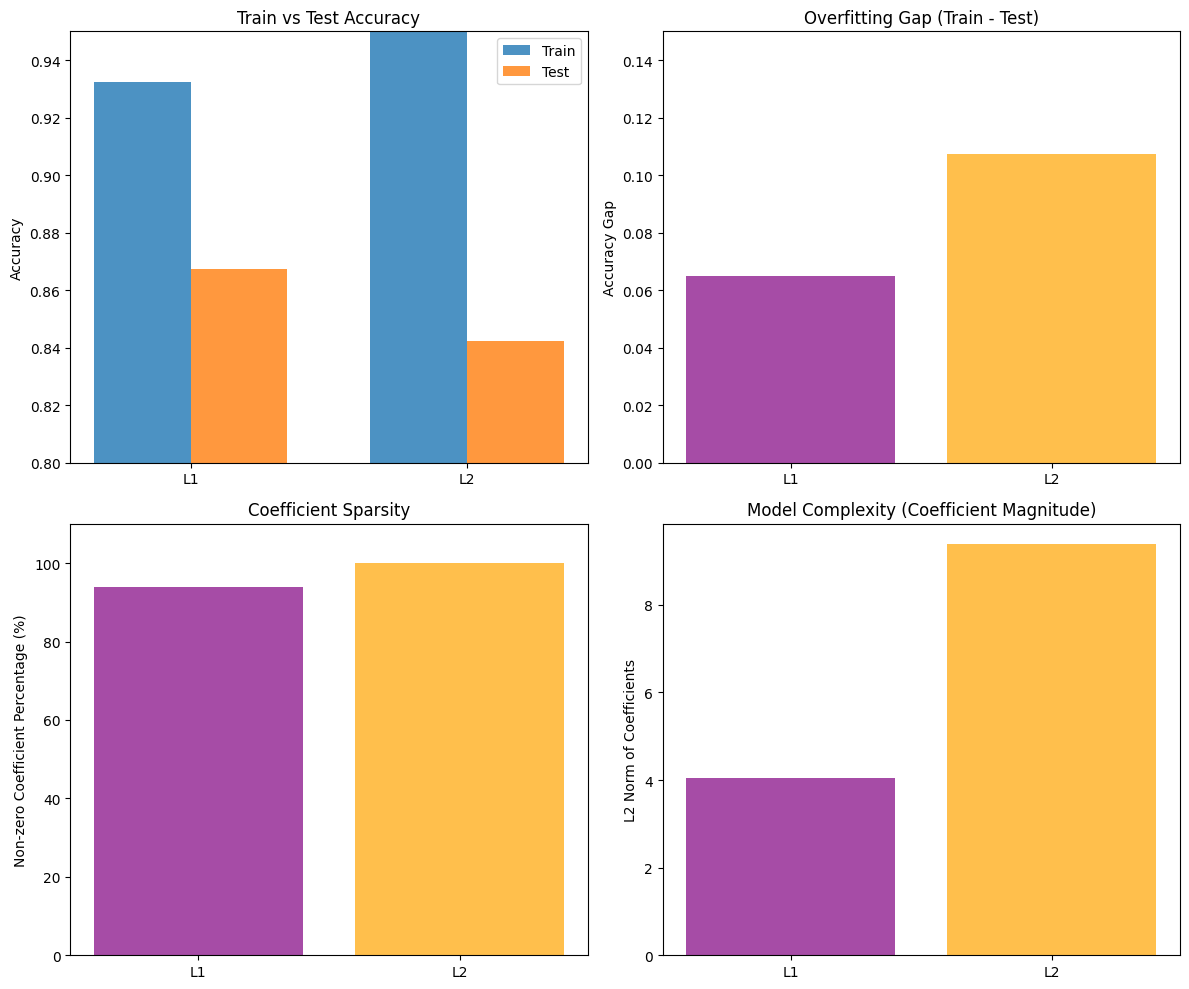

In [23]:
# Observe Effects on Generalization, Overfitting, and Decision Boundaries

# Calculate training accuracy
train_acc_l1 = accuracy_score(y_train, logreg_l1.predict(X_train))
train_acc_l2 = accuracy_score(y_train, logreg_l2.predict(X_train))

print("=" * 60)
print("L1 vs L2 Regularization Comparison")
print("=" * 60)
print(f"L1 Logistic Regression:")
print(f"  - Train accuracy: {train_acc_l1:.4f}")
print(f"  - Test accuracy:  {acc_l1:.4f}")
print(f"  - Overfitting gap: {train_acc_l1 - acc_l1:.4f}")

print(f"\nL2 Logistic Regression:")
print(f"  - Train accuracy: {train_acc_l2:.4f}")
print(f"  - Test accuracy:  {acc_l2:.4f}")
print(f"  - Overfitting gap: {train_acc_l2 - acc_l2:.4f}")

# Analyze coefficient sparsity
l1_coef = logreg_l1.coef_
l2_coef = logreg_l2.coef_

# Calculate percentage of non-zero coefficients
l1_nonzero = np.sum(l1_coef != 0) / l1_coef.size * 100
l2_nonzero = np.sum(l2_coef != 0) / l2_coef.size * 100

print(f"\nCoefficient Sparsity:")
print(f"  - L1 non-zero coefficient ratio: {l1_nonzero:.2f}%")
print(f"  - L2 non-zero coefficient ratio: {l2_nonzero:.2f}%")

# Calculate coefficient norms
l1_norm = np.linalg.norm(l1_coef)
l2_norm = np.linalg.norm(l2_coef)

print(f"\nCoefficient L2 Norm:")
print(f"  - L1 model: {l1_norm:.4f}")
print(f"  - L2 model: {l2_norm:.4f}")

# Visualization comparison
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Subplot 1: Accuracy comparison
models = ['L1', 'L2']
train_accs = [train_acc_l1, train_acc_l2]
test_accs = [acc_l1, acc_l2]

x = np.arange(len(models))
width = 0.35

axes[0, 0].bar(x - width/2, train_accs, width, label='Train', alpha=0.8)
axes[0, 0].bar(x + width/2, test_accs, width, label='Test', alpha=0.8)
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_title('Train vs Test Accuracy')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(models)
axes[0, 0].legend()
axes[0, 0].set_ylim([0.8, 0.95])

# Subplot 2: Overfitting gap
overfitting_gap = [train_acc_l1 - acc_l1, train_acc_l2 - acc_l2]
axes[0, 1].bar(models, overfitting_gap, color=['purple', 'orange'], alpha=0.7)
axes[0, 1].set_ylabel('Accuracy Gap')
axes[0, 1].set_title('Overfitting Gap (Train - Test)')
axes[0, 1].set_ylim([0, 0.15])

# Subplot 3: Coefficient sparsity
sparsity = [l1_nonzero, l2_nonzero]
axes[1, 0].bar(models, sparsity, color=['purple', 'orange'], alpha=0.7)
axes[1, 0].set_ylabel('Non-zero Coefficient Percentage (%)')
axes[1, 0].set_title('Coefficient Sparsity')
axes[1, 0].set_ylim([0, 110])

# Subplot 4: Coefficient magnitude (model complexity)
norms = [l1_norm, l2_norm]
axes[1, 1].bar(models, norms, color=['purple', 'orange'], alpha=0.7)
axes[1, 1].set_ylabel('L2 Norm of Coefficients')
axes[1, 1].set_title('Model Complexity (Coefficient Magnitude)')

plt.tight_layout()
plt.show()

3. Feature Importance Visualization
    - Visualize learned weight matrix for each class (e.g., as an 8×8 heatmap).
    - Reflect on what the model focuses on per class.

c:\Users\Ruolin Wang\.conda\envs\ML_assignment1\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
C:\Users\Ruolin Wang\AppData\Local\Temp\ipykernel_15720\1553497836.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


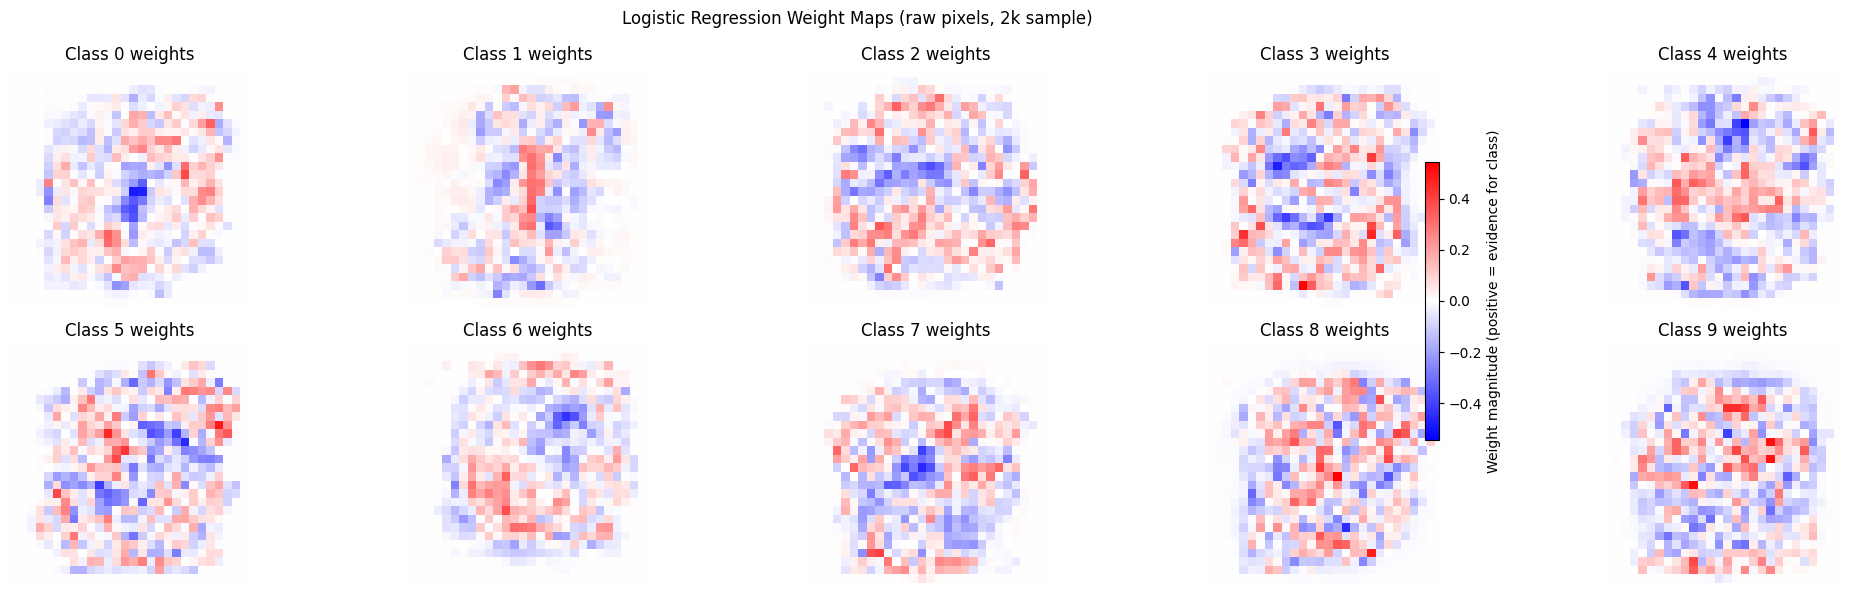

Positive (red) regions increase log-odds for the class; blue regions decrease it.


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Train a multinomial-capable logistic regression on raw pixels (2k subset) for weight visualization
scaler_raw = StandardScaler()
X_small_scaled_raw = scaler_raw.fit_transform(X_small)
logreg_vis = LogisticRegression(penalty="l2", C=1.0, solver="lbfgs", max_iter=300, random_state=42)
logreg_vis.fit(X_small_scaled_raw, y_small)

# Extract coefficients: shape (n_classes, n_features)
coefs = logreg_vis.coef_
vmax = np.max(np.abs(coefs))
fig, axes = plt.subplots(2, 5, figsize=(20, 6))
for cls, ax in enumerate(axes.flat):
    weight_map = coefs[cls].reshape(28, 28)
    im = ax.imshow(weight_map, cmap="bwr", vmin=-vmax, vmax=vmax)
    ax.set_title(f"Class {cls} weights")
    ax.axis("off")
cbar = fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.6)
cbar.set_label("Weight magnitude (positive = evidence for class)")
plt.suptitle("Logistic Regression Weight Maps (raw pixels, 2k sample)")
plt.tight_layout()
plt.show()
print("Positive (red) regions increase log-odds for the class; blue regions decrease it.")

4. Use Cross-Validation
    - Replace train/test split with 5-fold or 10-fold cross-validation.
    - Report mean accuracy, standard deviation, and robustness insights.

In [25]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline

# 5-fold and 10-fold cross-validation on the 2k subset with PCA + Logistic Regression
cv_configs = {
    "5-fold": StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    "10-fold": StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
}

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=50, random_state=42)),
    ("clf", LogisticRegression(penalty="l2", C=1.0, solver="lbfgs", max_iter=300, random_state=42)),
])

for name, cv in cv_configs.items():
    scores = cross_val_score(pipeline, X_small, y_small, cv=cv, scoring="accuracy", n_jobs=-1)
    print(f"{name} accuracy: mean={scores.mean():.4f}, std={scores.std():.4f}")
    print(f"Fold scores: {scores.round(4)}")
    print("-" * 50)

print("Higher std = more variability (less robust); compare mean with hold-out split.")

5-fold accuracy: mean=0.8470, std=0.0060
Fold scores: [0.8525 0.8375 0.8425 0.85   0.8525]
--------------------------------------------------
10-fold accuracy: mean=0.8520, std=0.0201
Fold scores: [0.88  0.84  0.87  0.83  0.88  0.835 0.835 0.825 0.865 0.86 ]
--------------------------------------------------
Higher std = more variability (less robust); compare mean with hold-out split.


## Part 2 – Generative Model (GAN) Extensions
5. Hyperparameter Sensitivity
    - Vary batch size, learning rate, and hidden layer size.
    - Track and explain training stability and output quality.

EXPERIMENT 1: BATCH SIZE SENSITIVITY
Testing: batch_size ∈ {32, 64, 128, 256}
--------------------------------------------------------------------------------

🔹 Training with batch_size = 32
   Final loss_D: 0.4529, loss_G: 1.0814
   Stability (std of last 100 steps) - D: 0.0219, G: 0.0375


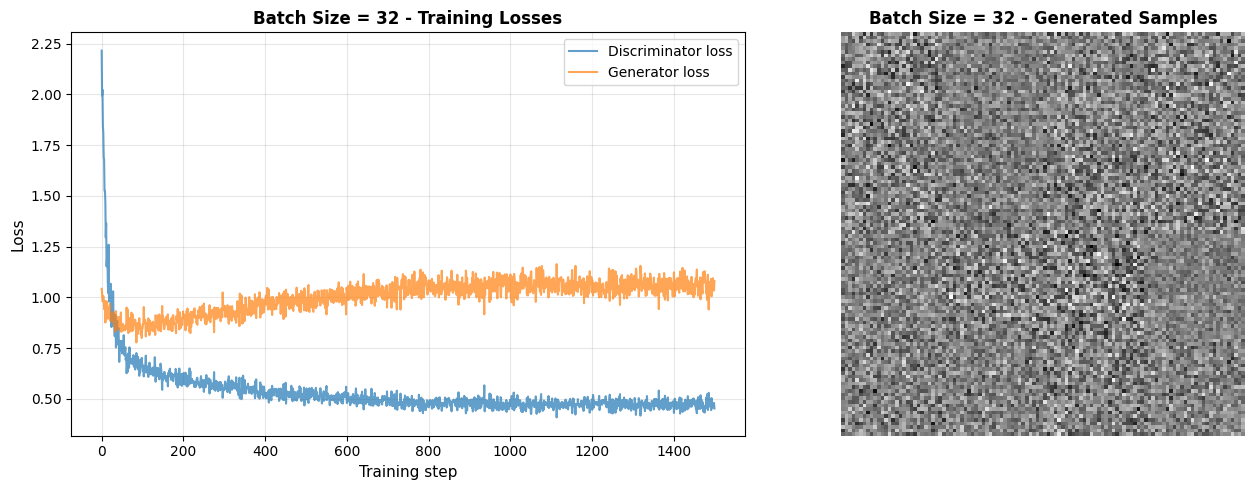


🔹 Training with batch_size = 64
   Final loss_D: 0.4732, loss_G: 1.0569
   Stability (std of last 100 steps) - D: 0.0126, G: 0.0222


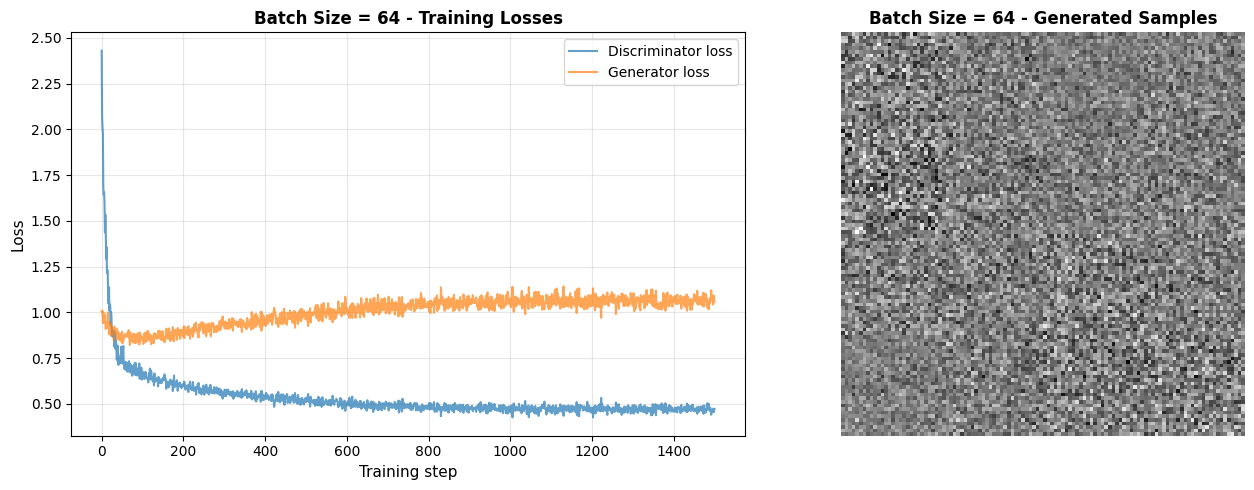


🔹 Training with batch_size = 128
   Final loss_D: 0.4842, loss_G: 1.0459
   Stability (std of last 100 steps) - D: 0.0100, G: 0.0176


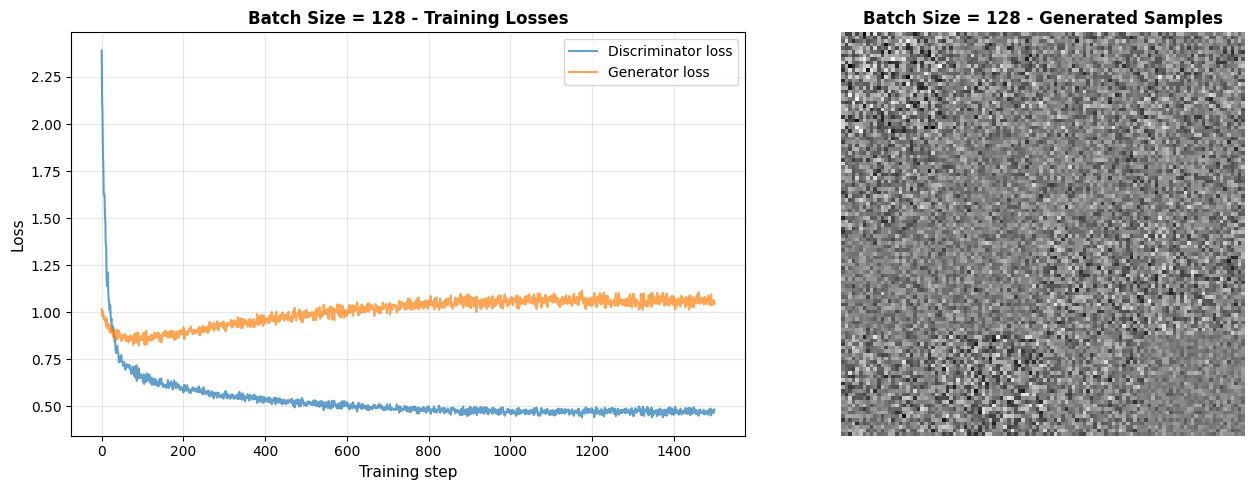


🔹 Training with batch_size = 256
   Final loss_D: 0.4631, loss_G: 1.0756
   Stability (std of last 100 steps) - D: 0.0071, G: 0.0127


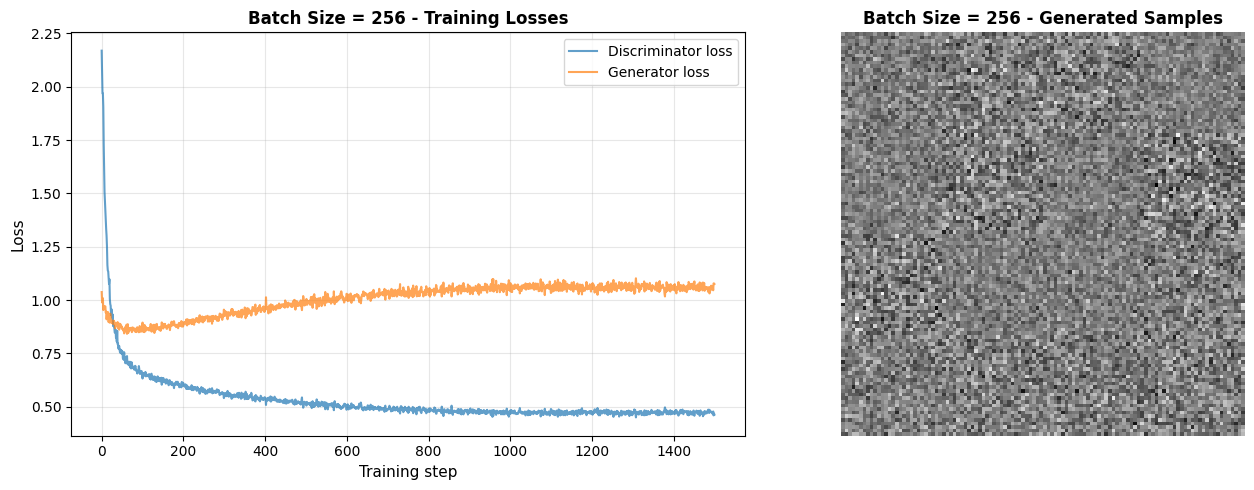


BATCH SIZE ANALYSIS SUMMARY
Batch= 32 | Final D:0.4529 G:1.0814 | Stability D:0.0219 G:0.0375
Batch= 64 | Final D:0.4732 G:1.0569 | Stability D:0.0126 G:0.0222
Batch=128 | Final D:0.4842 G:1.0459 | Stability D:0.0100 G:0.0176
Batch=256 | Final D:0.4631 G:1.0756 | Stability D:0.0071 G:0.0127


EXPERIMENT 2: LEARNING RATE SENSITIVITY
Testing: learning_rate ∈ {0.0001, 0.0005, 0.001, 0.002}
--------------------------------------------------------------------------------

🔹 Training with learning_rate = 0.0001
   Final loss_D: 0.5527, loss_G: 0.9531
   Stability (std of last 100 steps) - D: 0.0149, G: 0.0204


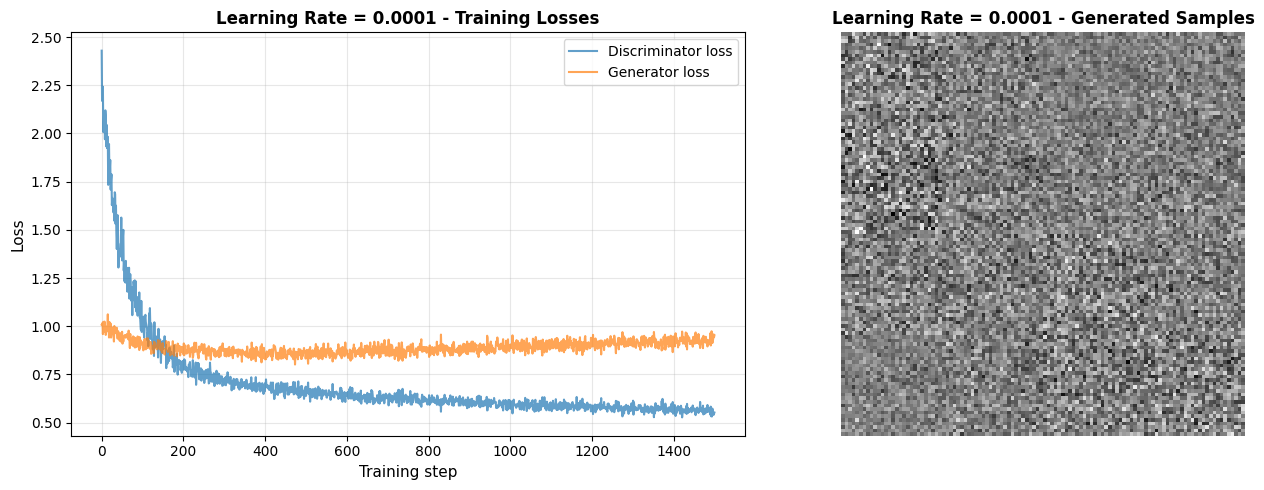


🔹 Training with learning_rate = 0.0005
   Final loss_D: 0.4732, loss_G: 1.0569
   Stability (std of last 100 steps) - D: 0.0126, G: 0.0222


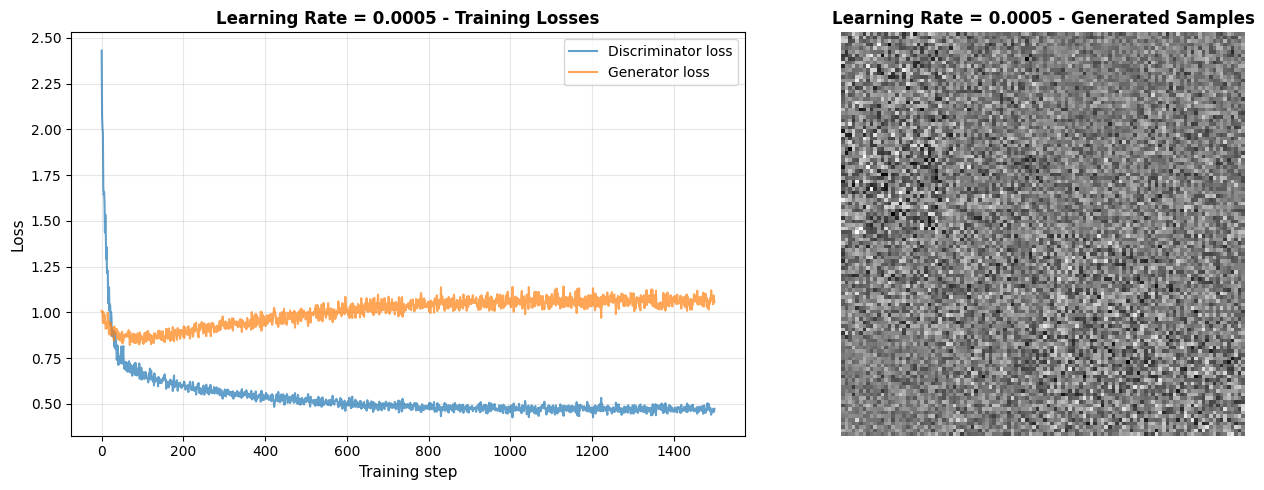


🔹 Training with learning_rate = 0.001
   Final loss_D: 0.4691, loss_G: 1.0562
   Stability (std of last 100 steps) - D: 0.0123, G: 0.0208


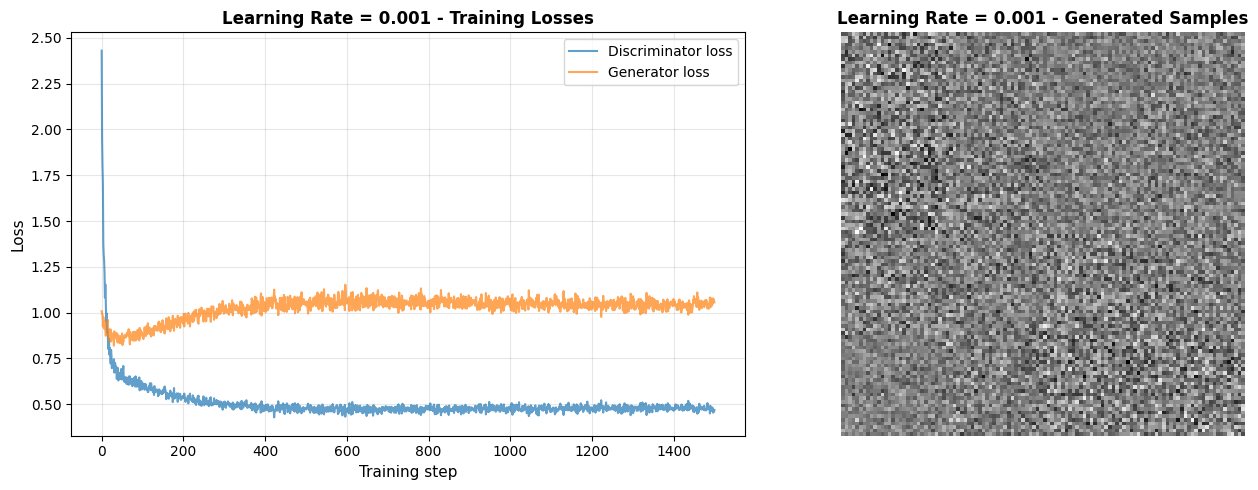


🔹 Training with learning_rate = 0.002
   Final loss_D: 0.5181, loss_G: 0.9955
   Stability (std of last 100 steps) - D: 0.0154, G: 0.0198


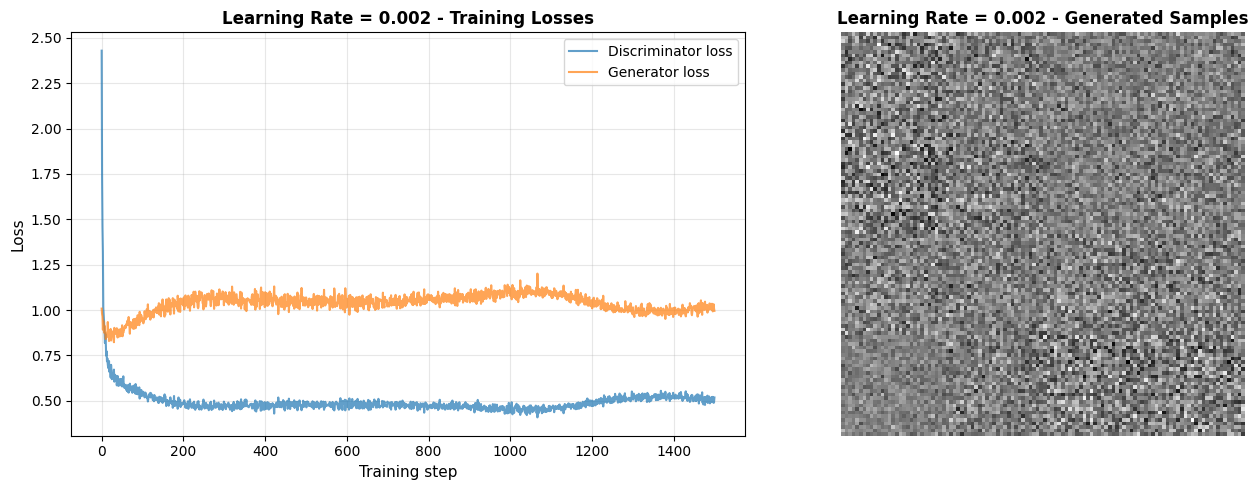


LEARNING RATE ANALYSIS SUMMARY
LR=0.0001 | Final D:0.5527 G:0.9531 | Stability D:0.0149 G:0.0204
LR=0.0005 | Final D:0.4732 G:1.0569 | Stability D:0.0126 G:0.0222
LR=0.0010 | Final D:0.4691 G:1.0562 | Stability D:0.0123 G:0.0208
LR=0.0020 | Final D:0.5181 G:0.9955 | Stability D:0.0154 G:0.0198


EXPERIMENT 3: HIDDEN LAYER SIZE SENSITIVITY
Testing: hidden_dim ∈ {32, 64, 128, 256}
--------------------------------------------------------------------------------

🔹 Training with hidden_dim = 32
   Final loss_D: 0.5938, loss_G: 0.8362
   Stability (std of last 100 steps) - D: 0.0072, G: 0.0097


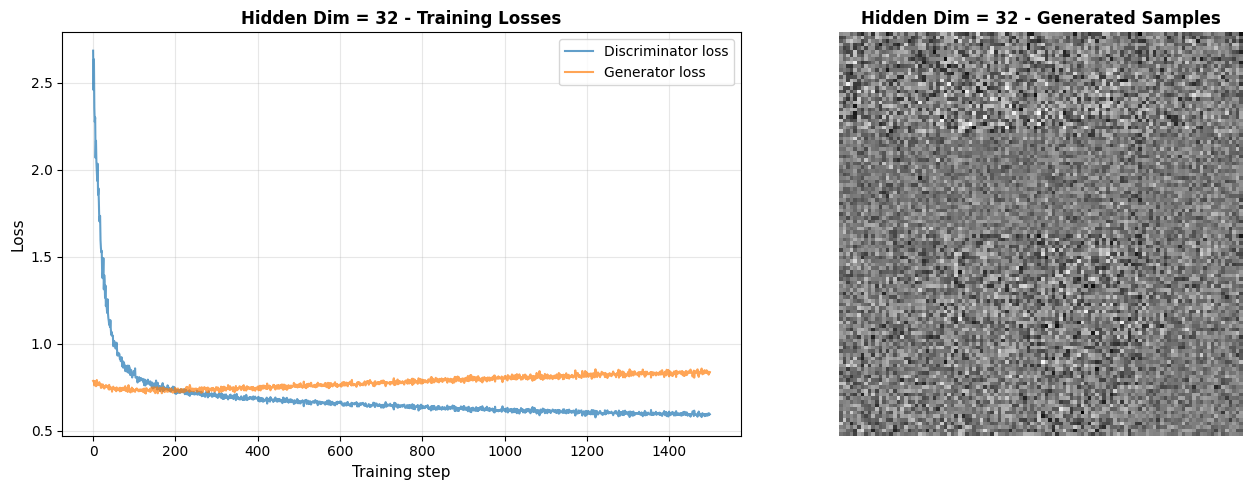


🔹 Training with hidden_dim = 64
   Final loss_D: 0.4732, loss_G: 1.0569
   Stability (std of last 100 steps) - D: 0.0126, G: 0.0222


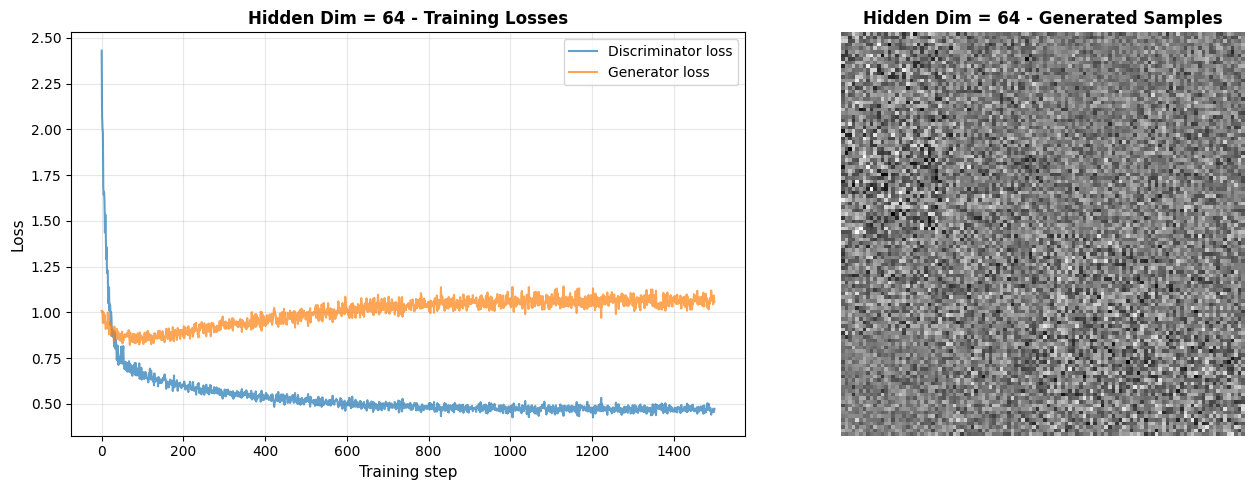


🔹 Training with hidden_dim = 128
   Final loss_D: 0.4702, loss_G: 1.1841
   Stability (std of last 100 steps) - D: 0.0187, G: 0.0368


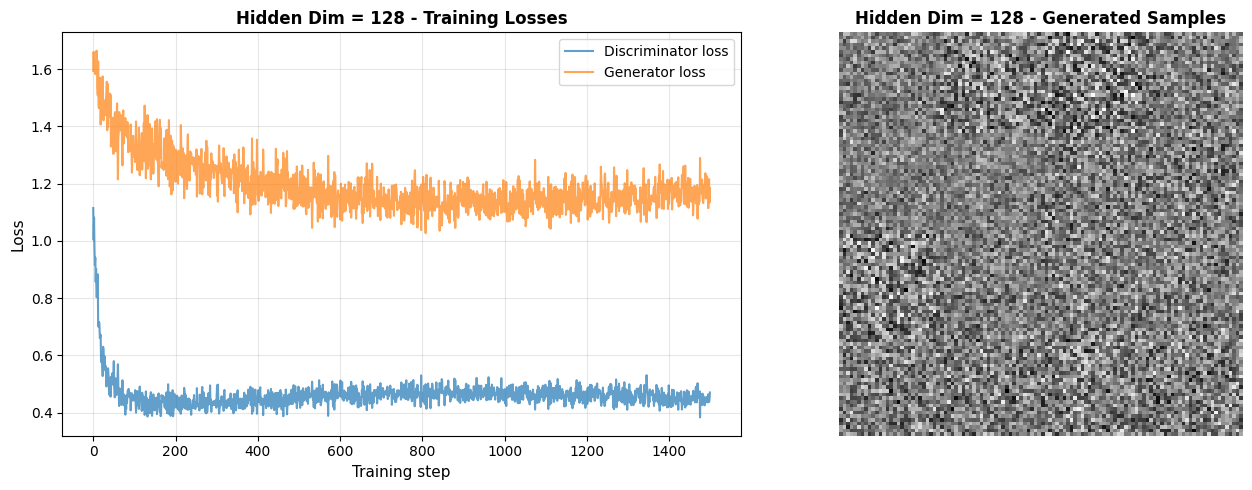


🔹 Training with hidden_dim = 256
   Final loss_D: 0.3271, loss_G: 1.5651
   Stability (std of last 100 steps) - D: 0.0226, G: 0.0661


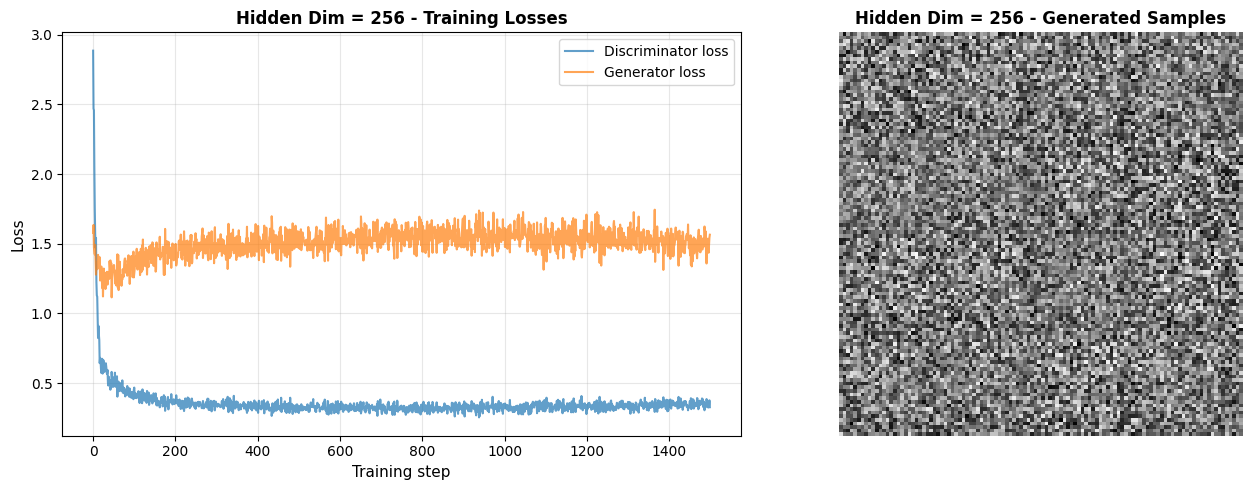


HIDDEN LAYER SIZE ANALYSIS SUMMARY
Hidden= 32 | Final D:0.5938 G:0.8362 | Stability D:0.0072 G:0.0097
Hidden= 64 | Final D:0.4732 G:1.0569 | Stability D:0.0126 G:0.0222
Hidden=128 | Final D:0.4702 G:1.1841 | Stability D:0.0187 G:0.0368
Hidden=256 | Final D:0.3271 G:1.5651 | Stability D:0.0226 G:0.0661


COMPARATIVE ANALYSIS


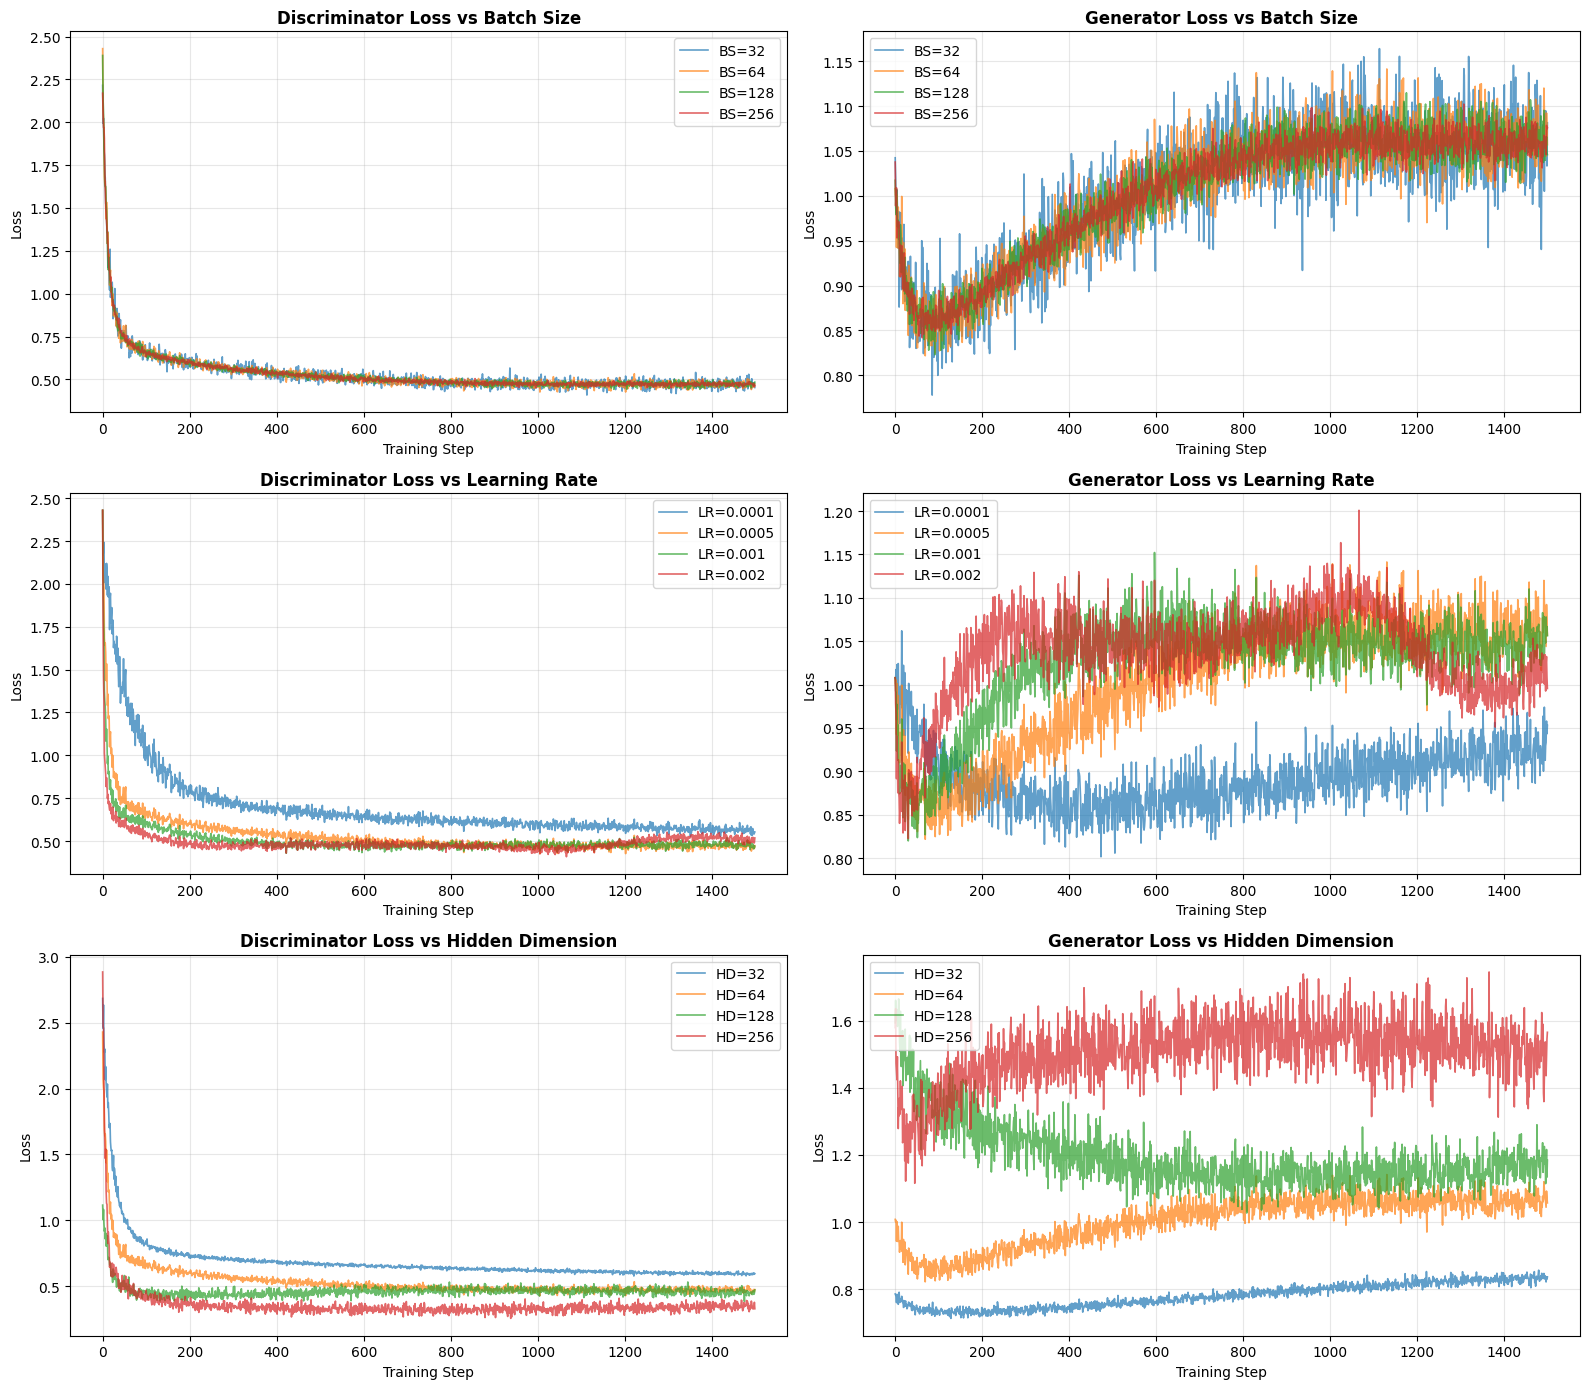


✅ Hyperparameter sensitivity analysis complete!


In [29]:
# ============================================================================
# Hyperparameter Sensitivity Analysis: Batch Size, Learning Rate, Hidden Dimensions
# ============================================================================

def train_gan(X_data, noise_dim=20, hidden_dim_g=64, hidden_dim_d=64, 
              batch_size=64, learning_rate_d=0.0005, learning_rate_g=0.0005, 
              num_steps=1500, random_seed=42, verbose=True):
    """
    Train a simple GAN with configurable hyperparameters.
    
    Parameters:
    -----------
    X_data : numpy array
        Training data, shape (n_samples, n_features), normalized to [-1, 1]
    noise_dim : int
        Dimension of input noise vector
    hidden_dim_g : int
        Hidden layer size for generator
    hidden_dim_d : int
        Hidden layer size for discriminator
    batch_size : int
        Mini-batch size
    learning_rate_d : float
        Learning rate for discriminator
    learning_rate_g : float
        Learning rate for generator
    num_steps : int
        Number of training iterations
    random_seed : int
        Random seed for reproducibility
    verbose : bool
        Whether to print training progress
    
    Returns:
    --------
    dict : Dictionary containing training results and metrics
    """
    
    # Initialize weights
    rng = np.random.default_rng(seed=random_seed)
    
    # Generator weights
    W1_g = rng.normal(0, 0.1, size=(noise_dim, hidden_dim_g))
    b1_g = np.zeros(hidden_dim_g)
    W2_g = rng.normal(0, 0.1, size=(hidden_dim_g, X_data.shape[1]))
    b2_g = np.zeros(X_data.shape[1])
    
    # Discriminator weights
    W1_d = rng.normal(0, 0.1, size=(X_data.shape[1], hidden_dim_d))
    b1_d = np.zeros(hidden_dim_d)
    W2_d = rng.normal(0, 0.1, size=(hidden_dim_d, 1))
    b2_d = np.zeros(1)
    
    def sigmoid(x):
        return 1.0 / (1.0 + np.exp(-np.clip(x, -500, 500)))
    
    # Training history
    losses_d = []
    losses_g = []
    
    # Training loop
    for step in range(num_steps):
        # Sample minibatch of real images
        idx = rng.choice(len(X_data), size=batch_size, replace=False)
        real_batch = X_data[idx]
        
        # Sample random noise
        z = rng.normal(0, 1, size=(batch_size, noise_dim))
        
        # -------- Generator forward pass --------
        g_h_pre = z @ W1_g + b1_g
        g_h = np.maximum(0, g_h_pre)
        g_pre = g_h @ W2_g + b2_g
        fake_batch = np.tanh(g_pre)
        
        # -------- Discriminator forward pass on real images --------
        d_h_pre_real = real_batch @ W1_d + b1_d
        d_h_real = np.maximum(0, d_h_pre_real)
        d_logits_real = d_h_real @ W2_d + b2_d
        d_out_real = sigmoid(d_logits_real)
        
        # -------- Discriminator forward pass on fake images --------
        d_h_pre_fake = fake_batch @ W1_d + b1_d
        d_h_fake = np.maximum(0, d_h_pre_fake)
        d_logits_fake = d_h_fake @ W2_d + b2_d
        d_out_fake = sigmoid(d_logits_fake)
        
        # -------- Discriminator loss and gradients --------
        y_real = np.ones((batch_size, 1))
        y_fake = np.zeros((batch_size, 1))
        loss_d = -(np.mean(np.log(d_out_real + 1e-8)) + np.mean(np.log(1 - d_out_fake + 1e-8)))
        
        d_delta_real = (d_out_real - y_real) / batch_size
        d_delta_fake = (d_out_fake - y_fake) / batch_size
        
        grad_W2_d = d_h_real.T @ d_delta_real + d_h_fake.T @ d_delta_fake
        grad_b2_d = np.sum(d_delta_real + d_delta_fake, axis=0)
        
        d_grad_h_real = d_delta_real @ W2_d.T
        d_grad_h_real[d_h_pre_real <= 0] = 0
        d_grad_h_fake = d_delta_fake @ W2_d.T
        d_grad_h_fake[d_h_pre_fake <= 0] = 0
        
        grad_W1_d = real_batch.T @ d_grad_h_real + fake_batch.T @ d_grad_h_fake
        grad_b1_d = np.sum(d_grad_h_real + d_grad_h_fake, axis=0)
        
        # Update discriminator
        W2_d -= learning_rate_d * grad_W2_d
        b2_d -= learning_rate_d * grad_b2_d
        W1_d -= learning_rate_d * grad_W1_d
        b1_d -= learning_rate_d * grad_b1_d
        
        # -------- Generator loss and gradients --------
        y_gen = np.ones((batch_size, 1))
        loss_g = -np.mean(np.log(d_out_fake + 1e-8))
        
        g_delta_d = (d_out_fake - y_gen) / batch_size
        g_grad_h_fake = g_delta_d @ W2_d.T
        g_grad_h_fake[d_h_pre_fake <= 0] = 0
        
        grad_fake_input = g_grad_h_fake @ W1_d.T
        grad_g_pre = grad_fake_input * (1 - fake_batch ** 2)
        
        grad_W2_g = g_h.T @ grad_g_pre
        grad_b2_g = np.sum(grad_g_pre, axis=0)
        
        g_grad_h = grad_g_pre @ W2_g.T
        g_grad_h[g_h_pre <= 0] = 0
        
        grad_W1_g = z.T @ g_grad_h
        grad_b1_g = np.sum(g_grad_h, axis=0)
        
        # Update generator
        W2_g -= learning_rate_g * grad_W2_g
        b2_g -= learning_rate_g * grad_b2_g
        W1_g -= learning_rate_g * grad_W1_g
        b1_g -= learning_rate_g * grad_b1_g
        
        # Record losses
        losses_d.append(loss_d)
        losses_g.append(loss_g)
        
        if verbose and (step + 1) % 500 == 0:
            print(f'Step {step+1}/{num_steps}, loss_D={loss_d:.4f}, loss_G={loss_g:.4f}')
    
    # Generate samples after training
    z_sample = rng.normal(0, 1, size=(16, noise_dim))
    g_h_pre = z_sample @ W1_g + b1_g
    g_h = np.maximum(0, g_h_pre)
    g_pre = g_h @ W2_g + b2_g
    fake_samples = np.tanh(g_pre)
    
    return {
        'losses_d': losses_d,
        'losses_g': losses_g,
        'fake_samples': fake_samples,
        'final_loss_d': losses_d[-1],
        'final_loss_g': losses_g[-1],
        'loss_stability_d': np.std(losses_d[-100:]),  # Stability in last 100 steps
        'loss_stability_g': np.std(losses_g[-100:]),
    }


def visualize_gan_results(results, title="GAN Results"):
    """Visualize GAN training results with loss curves and generated samples."""
    losses_d = results['losses_d']
    losses_g = results['losses_g']
    fake_samples = results['fake_samples']
    
    fig = plt.figure(figsize=(14, 5))
    
    # Plot 1: Loss curves
    ax1 = plt.subplot(1, 2, 1)
    ax1.plot(losses_d, label='Discriminator loss', alpha=0.7, linewidth=1.5)
    ax1.plot(losses_g, label='Generator loss', alpha=0.7, linewidth=1.5)
    ax1.set_xlabel('Training step', fontsize=11)
    ax1.set_ylabel('Loss', fontsize=11)
    ax1.set_title(f'{title} - Training Losses', fontsize=12, fontweight='bold')
    ax1.legend(fontsize=10)
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Generated samples
    ax2 = plt.subplot(1, 2, 2)
    samples_grid = fake_samples[:16].reshape(4, 4, 28, 28)
    samples_grid = np.transpose(samples_grid, (0, 2, 1, 3))
    samples_grid = samples_grid.reshape(4*28, 4*28)
    ax2.imshow(samples_grid, cmap='gray')
    ax2.set_title(f'{title} - Generated Samples', fontsize=12, fontweight='bold')
    ax2.axis('off')
    
    plt.tight_layout()
    plt.show()


# ============================================================================
# Experiment 1: Varying Batch Size
# ============================================================================
print("=" * 80)
print("EXPERIMENT 1: BATCH SIZE SENSITIVITY")
print("=" * 80)
print("Testing: batch_size ∈ {32, 64, 128, 256}")
print("-" * 80)

batch_sizes = [32, 64, 128, 256]
batch_results = {}

for bs in batch_sizes:
    print(f"\n🔹 Training with batch_size = {bs}")
    results = train_gan(
        X_data=X_gan,
        batch_size=bs,
        learning_rate_d=0.0005,
        learning_rate_g=0.0005,
        hidden_dim_g=64,
        hidden_dim_d=64,
        num_steps=1500,
        random_seed=42,
        verbose=False
    )
    batch_results[bs] = results
    print(f"   Final loss_D: {results['final_loss_d']:.4f}, loss_G: {results['final_loss_g']:.4f}")
    print(f"   Stability (std of last 100 steps) - D: {results['loss_stability_d']:.4f}, G: {results['loss_stability_g']:.4f}")
    visualize_gan_results(results, f"Batch Size = {bs}")

print("\n" + "=" * 80)
print("BATCH SIZE ANALYSIS SUMMARY")
print("=" * 80)
for bs in batch_sizes:
    r = batch_results[bs]
    print(f"Batch={bs:3d} | Final D:{r['final_loss_d']:.4f} G:{r['final_loss_g']:.4f} | "
          f"Stability D:{r['loss_stability_d']:.4f} G:{r['loss_stability_g']:.4f}")


# ============================================================================
# Experiment 2: Varying Learning Rate
# ============================================================================
print("\n\n" + "=" * 80)
print("EXPERIMENT 2: LEARNING RATE SENSITIVITY")
print("=" * 80)
print("Testing: learning_rate ∈ {0.0001, 0.0005, 0.001, 0.002}")
print("-" * 80)

learning_rates = [0.0001, 0.0005, 0.001, 0.002]
lr_results = {}

for lr in learning_rates:
    print(f"\n🔹 Training with learning_rate = {lr}")
    results = train_gan(
        X_data=X_gan,
        batch_size=64,
        learning_rate_d=lr,
        learning_rate_g=lr,
        hidden_dim_g=64,
        hidden_dim_d=64,
        num_steps=1500,
        random_seed=42,
        verbose=False
    )
    lr_results[lr] = results
    print(f"   Final loss_D: {results['final_loss_d']:.4f}, loss_G: {results['final_loss_g']:.4f}")
    print(f"   Stability (std of last 100 steps) - D: {results['loss_stability_d']:.4f}, G: {results['loss_stability_g']:.4f}")
    visualize_gan_results(results, f"Learning Rate = {lr}")

print("\n" + "=" * 80)
print("LEARNING RATE ANALYSIS SUMMARY")
print("=" * 80)
for lr in learning_rates:
    r = lr_results[lr]
    print(f"LR={lr:.4f} | Final D:{r['final_loss_d']:.4f} G:{r['final_loss_g']:.4f} | "
          f"Stability D:{r['loss_stability_d']:.4f} G:{r['loss_stability_g']:.4f}")


# ============================================================================
# Experiment 3: Varying Hidden Layer Size
# ============================================================================
print("\n\n" + "=" * 80)
print("EXPERIMENT 3: HIDDEN LAYER SIZE SENSITIVITY")
print("=" * 80)
print("Testing: hidden_dim ∈ {32, 64, 128, 256}")
print("-" * 80)

hidden_dims = [32, 64, 128, 256]
hidden_results = {}

for hd in hidden_dims:
    print(f"\n🔹 Training with hidden_dim = {hd}")
    results = train_gan(
        X_data=X_gan,
        batch_size=64,
        learning_rate_d=0.0005,
        learning_rate_g=0.0005,
        hidden_dim_g=hd,
        hidden_dim_d=hd,
        num_steps=1500,
        random_seed=42,
        verbose=False
    )
    hidden_results[hd] = results
    print(f"   Final loss_D: {results['final_loss_d']:.4f}, loss_G: {results['final_loss_g']:.4f}")
    print(f"   Stability (std of last 100 steps) - D: {results['loss_stability_d']:.4f}, G: {results['loss_stability_g']:.4f}")
    visualize_gan_results(results, f"Hidden Dim = {hd}")

print("\n" + "=" * 80)
print("HIDDEN LAYER SIZE ANALYSIS SUMMARY")
print("=" * 80)
for hd in hidden_dims:
    r = hidden_results[hd]
    print(f"Hidden={hd:3d} | Final D:{r['final_loss_d']:.4f} G:{r['final_loss_g']:.4f} | "
          f"Stability D:{r['loss_stability_d']:.4f} G:{r['loss_stability_g']:.4f}")


# ============================================================================
# Comparative Visualization
# ============================================================================
print("\n\n" + "=" * 80)
print("COMPARATIVE ANALYSIS")
print("=" * 80)

fig, axes = plt.subplots(3, 2, figsize=(16, 14))

# Row 1: Batch Size Comparison
ax = axes[0, 0]
for bs in batch_sizes:
    ax.plot(batch_results[bs]['losses_d'], label=f'BS={bs}', alpha=0.7, linewidth=1.2)
ax.set_title('Discriminator Loss vs Batch Size', fontsize=12, fontweight='bold')
ax.set_xlabel('Training Step')
ax.set_ylabel('Loss')
ax.legend()
ax.grid(True, alpha=0.3)

ax = axes[0, 1]
for bs in batch_sizes:
    ax.plot(batch_results[bs]['losses_g'], label=f'BS={bs}', alpha=0.7, linewidth=1.2)
ax.set_title('Generator Loss vs Batch Size', fontsize=12, fontweight='bold')
ax.set_xlabel('Training Step')
ax.set_ylabel('Loss')
ax.legend()
ax.grid(True, alpha=0.3)

# Row 2: Learning Rate Comparison
ax = axes[1, 0]
for lr in learning_rates:
    ax.plot(lr_results[lr]['losses_d'], label=f'LR={lr}', alpha=0.7, linewidth=1.2)
ax.set_title('Discriminator Loss vs Learning Rate', fontsize=12, fontweight='bold')
ax.set_xlabel('Training Step')
ax.set_ylabel('Loss')
ax.legend()
ax.grid(True, alpha=0.3)

ax = axes[1, 1]
for lr in learning_rates:
    ax.plot(lr_results[lr]['losses_g'], label=f'LR={lr}', alpha=0.7, linewidth=1.2)
ax.set_title('Generator Loss vs Learning Rate', fontsize=12, fontweight='bold')
ax.set_xlabel('Training Step')
ax.set_ylabel('Loss')
ax.legend()
ax.grid(True, alpha=0.3)

# Row 3: Hidden Dim Comparison
ax = axes[2, 0]
for hd in hidden_dims:
    ax.plot(hidden_results[hd]['losses_d'], label=f'HD={hd}', alpha=0.7, linewidth=1.2)
ax.set_title('Discriminator Loss vs Hidden Dimension', fontsize=12, fontweight='bold')
ax.set_xlabel('Training Step')
ax.set_ylabel('Loss')
ax.legend()
ax.grid(True, alpha=0.3)

ax = axes[2, 1]
for hd in hidden_dims:
    ax.plot(hidden_results[hd]['losses_g'], label=f'HD={hd}', alpha=0.7, linewidth=1.2)
ax.set_title('Generator Loss vs Hidden Dimension', fontsize=12, fontweight='bold')
ax.set_xlabel('Training Step')
ax.set_ylabel('Loss')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Hyperparameter sensitivity analysis complete!")

6. Visualize Training Progress
    - Save generator outputs at fixed intervals (e.g., every 500 steps).
    - Show how image quality improves (or worsens) over time.

GAN TRAINING PROGRESS VISUALIZATION
Training with snapshots every 500 steps...
--------------------------------------------------------------------------------
Training for 3000 steps, saving snapshots every 500 steps...
  Step    1: loss_D=2.1870, loss_G=1.0194
  Step  500: loss_D=0.5246, loss_G=0.9648
  Step 1000: loss_D=0.4834, loss_G=1.0718
  Step 1500: loss_D=0.4689, loss_G=1.0615
  Step 2000: loss_D=0.4765, loss_G=1.0576
  Step 2500: loss_D=0.4687, loss_G=1.0555
  Step 3000: loss_D=0.4758, loss_G=1.0507

VISUALIZING TRAINING PROGRESS


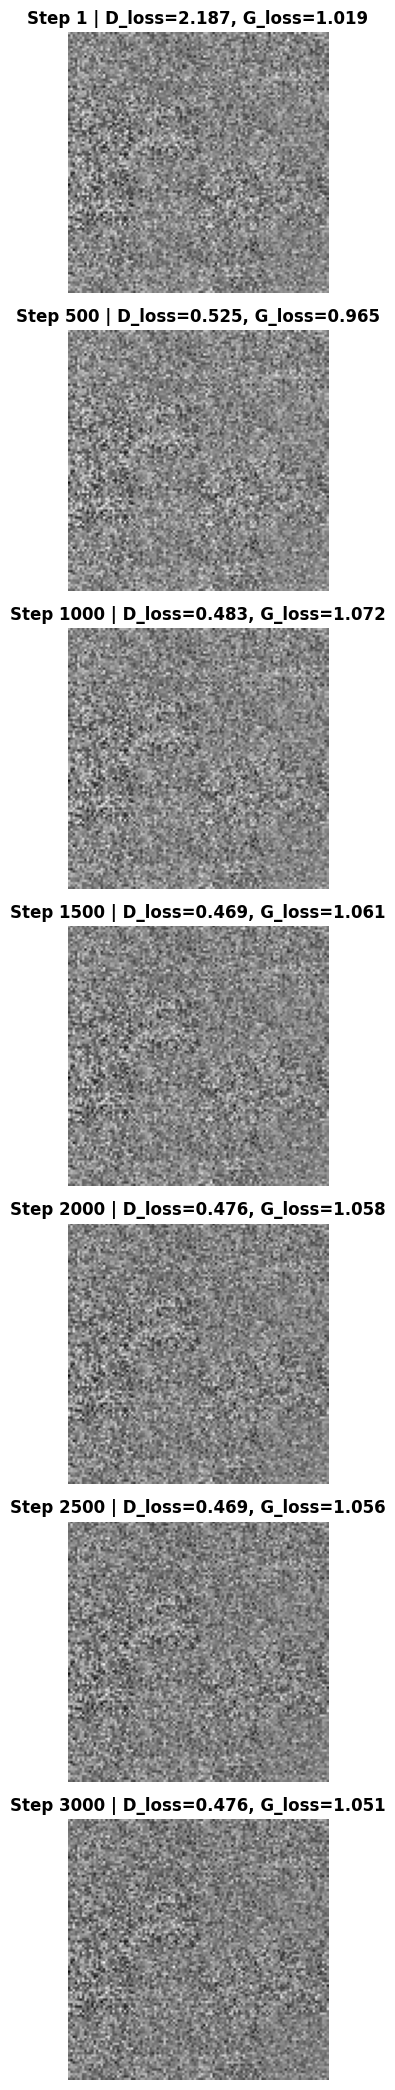

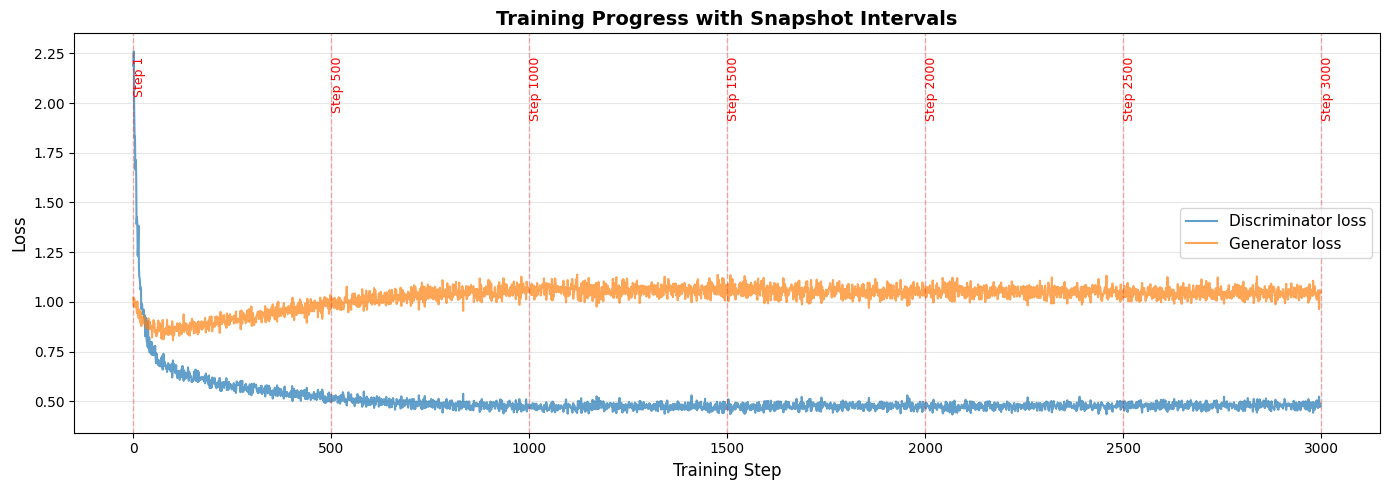

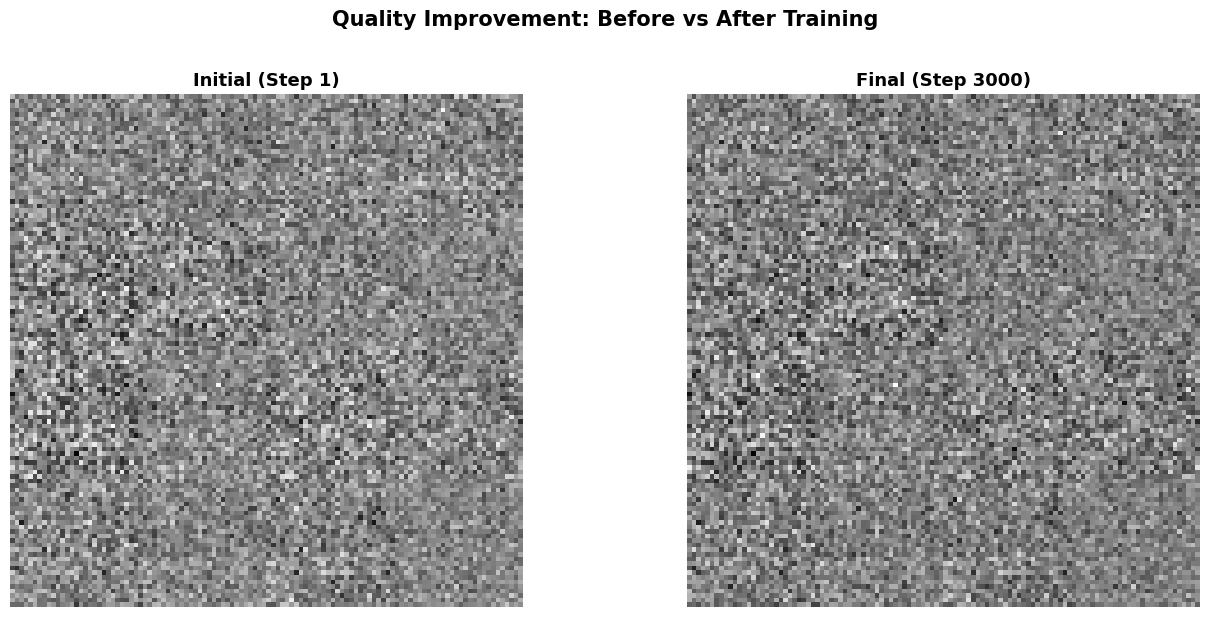


✅ Training progress visualization complete!
Total snapshots captured: 7
Snapshot steps: [1, 500, 1000, 1500, 2000, 2500, 3000]


In [30]:
# ============================================================================
# Visualize Training Progress Over Time
# ============================================================================

def train_gan_with_snapshots(X_data, noise_dim=20, hidden_dim_g=64, hidden_dim_d=64, 
                             batch_size=64, learning_rate_d=0.0005, learning_rate_g=0.0005, 
                             num_steps=3000, snapshot_interval=500, random_seed=42):
    """
    Train GAN and save generator outputs at fixed intervals.
    
    Parameters:
    -----------
    snapshot_interval : int
        Save generator outputs every N steps
    
    Returns:
    --------
    dict : Contains training history and snapshots at different steps
    """
    
    # Initialize weights
    rng = np.random.default_rng(seed=random_seed)
    
    # Generator weights
    W1_g = rng.normal(0, 0.1, size=(noise_dim, hidden_dim_g))
    b1_g = np.zeros(hidden_dim_g)
    W2_g = rng.normal(0, 0.1, size=(hidden_dim_g, X_data.shape[1]))
    b2_g = np.zeros(X_data.shape[1])
    
    # Discriminator weights
    W1_d = rng.normal(0, 0.1, size=(X_data.shape[1], hidden_dim_d))
    b1_d = np.zeros(hidden_dim_d)
    W2_d = rng.normal(0, 0.1, size=(hidden_dim_d, 1))
    b2_d = np.zeros(1)
    
    def sigmoid(x):
        return 1.0 / (1.0 + np.exp(-np.clip(x, -500, 500)))
    
    def generate_samples(num_samples=16):
        """Generate samples using current generator weights."""
        z = rng.normal(0, 1, size=(num_samples, noise_dim))
        g_h_pre = z @ W1_g + b1_g
        g_h = np.maximum(0, g_h_pre)
        g_pre = g_h @ W2_g + b2_g
        return np.tanh(g_pre)
    
    # Fixed noise for consistent comparison across training
    z_fixed = rng.normal(0, 1, size=(16, noise_dim))
    
    # Storage for snapshots
    snapshots = {}
    losses_d = []
    losses_g = []
    
    print(f"Training for {num_steps} steps, saving snapshots every {snapshot_interval} steps...")
    
    # Training loop
    for step in range(num_steps):
        # Sample minibatch
        idx = rng.choice(len(X_data), size=batch_size, replace=False)
        real_batch = X_data[idx]
        z = rng.normal(0, 1, size=(batch_size, noise_dim))
        
        # Generator forward
        g_h_pre = z @ W1_g + b1_g
        g_h = np.maximum(0, g_h_pre)
        g_pre = g_h @ W2_g + b2_g
        fake_batch = np.tanh(g_pre)
        
        # Discriminator forward on real
        d_h_pre_real = real_batch @ W1_d + b1_d
        d_h_real = np.maximum(0, d_h_pre_real)
        d_logits_real = d_h_real @ W2_d + b2_d
        d_out_real = sigmoid(d_logits_real)
        
        # Discriminator forward on fake
        d_h_pre_fake = fake_batch @ W1_d + b1_d
        d_h_fake = np.maximum(0, d_h_pre_fake)
        d_logits_fake = d_h_fake @ W2_d + b2_d
        d_out_fake = sigmoid(d_logits_fake)
        
        # Discriminator loss and update
        y_real = np.ones((batch_size, 1))
        y_fake = np.zeros((batch_size, 1))
        loss_d = -(np.mean(np.log(d_out_real + 1e-8)) + np.mean(np.log(1 - d_out_fake + 1e-8)))
        
        d_delta_real = (d_out_real - y_real) / batch_size
        d_delta_fake = (d_out_fake - y_fake) / batch_size
        
        grad_W2_d = d_h_real.T @ d_delta_real + d_h_fake.T @ d_delta_fake
        grad_b2_d = np.sum(d_delta_real + d_delta_fake, axis=0)
        
        d_grad_h_real = d_delta_real @ W2_d.T
        d_grad_h_real[d_h_pre_real <= 0] = 0
        d_grad_h_fake = d_delta_fake @ W2_d.T
        d_grad_h_fake[d_h_pre_fake <= 0] = 0
        
        grad_W1_d = real_batch.T @ d_grad_h_real + fake_batch.T @ d_grad_h_fake
        grad_b1_d = np.sum(d_grad_h_real + d_grad_h_fake, axis=0)
        
        W2_d -= learning_rate_d * grad_W2_d
        b2_d -= learning_rate_d * grad_b2_d
        W1_d -= learning_rate_d * grad_W1_d
        b1_d -= learning_rate_d * grad_b1_d
        
        # Generator loss and update
        y_gen = np.ones((batch_size, 1))
        loss_g = -np.mean(np.log(d_out_fake + 1e-8))
        
        g_delta_d = (d_out_fake - y_gen) / batch_size
        g_grad_h_fake = g_delta_d @ W2_d.T
        g_grad_h_fake[d_h_pre_fake <= 0] = 0
        
        grad_fake_input = g_grad_h_fake @ W1_d.T
        grad_g_pre = grad_fake_input * (1 - fake_batch ** 2)
        
        grad_W2_g = g_h.T @ grad_g_pre
        grad_b2_g = np.sum(grad_g_pre, axis=0)
        
        g_grad_h = grad_g_pre @ W2_g.T
        g_grad_h[g_h_pre <= 0] = 0
        
        grad_W1_g = z.T @ g_grad_h
        grad_b1_g = np.sum(g_grad_h, axis=0)
        
        W2_g -= learning_rate_g * grad_W2_g
        b2_g -= learning_rate_g * grad_b2_g
        W1_g -= learning_rate_g * grad_W1_g
        b1_g -= learning_rate_g * grad_b1_g
        
        # Record losses
        losses_d.append(loss_d)
        losses_g.append(loss_g)
        
        # Save snapshots at intervals
        if (step + 1) % snapshot_interval == 0 or step == 0:
            # Generate from fixed noise for consistent comparison
            g_h_pre_fixed = z_fixed @ W1_g + b1_g
            g_h_fixed = np.maximum(0, g_h_pre_fixed)
            g_pre_fixed = g_h_fixed @ W2_g + b2_g
            samples = np.tanh(g_pre_fixed)
            
            snapshots[step + 1] = {
                'samples': samples.copy(),
                'loss_d': loss_d,
                'loss_g': loss_g
            }
            print(f"  Step {step+1:4d}: loss_D={loss_d:.4f}, loss_G={loss_g:.4f}")
    
    return {
        'snapshots': snapshots,
        'losses_d': losses_d,
        'losses_g': losses_g,
        'snapshot_steps': sorted(snapshots.keys())
    }


def visualize_training_progress(results):
    """
    Visualize how generator outputs evolve during training.
    """
    snapshots = results['snapshots']
    snapshot_steps = results['snapshot_steps']
    losses_d = results['losses_d']
    losses_g = results['losses_g']
    
    num_snapshots = len(snapshot_steps)
    
    # ========================================================================
    # Figure 1: Generator outputs over time (Grid view)
    # ========================================================================
    fig = plt.figure(figsize=(18, 3 * num_snapshots))
    
    for idx, step in enumerate(snapshot_steps):
        samples = snapshots[step]['samples']
        
        # Create 4x4 grid of generated images
        ax = plt.subplot(num_snapshots, 1, idx + 1)
        samples_grid = samples[:16].reshape(4, 4, 28, 28)
        samples_grid = np.transpose(samples_grid, (0, 2, 1, 3))
        samples_grid = samples_grid.reshape(4*28, 4*28)
        
        ax.imshow(samples_grid, cmap='gray')
        ax.set_title(f'Step {step} | D_loss={snapshots[step]["loss_d"]:.3f}, '
                    f'G_loss={snapshots[step]["loss_g"]:.3f}',
                    fontsize=12, fontweight='bold')
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # ========================================================================
    # Figure 2: Loss curves with snapshot markers
    # ========================================================================
    fig, ax = plt.subplots(figsize=(14, 5))
    
    ax.plot(losses_d, label='Discriminator loss', alpha=0.7, linewidth=1.5, color='#1f77b4')
    ax.plot(losses_g, label='Generator loss', alpha=0.7, linewidth=1.5, color='#ff7f0e')
    
    # Mark snapshot points
    for step in snapshot_steps:
        ax.axvline(x=step-1, color='red', linestyle='--', alpha=0.3, linewidth=1)
        ax.text(step-1, ax.get_ylim()[1] * 0.95, f'Step {step}', 
               rotation=90, verticalalignment='top', fontsize=9, color='red')
    
    ax.set_xlabel('Training Step', fontsize=12)
    ax.set_ylabel('Loss', fontsize=12)
    ax.set_title('Training Progress with Snapshot Intervals', fontsize=14, fontweight='bold')
    ax.legend(fontsize=11)
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # ========================================================================
    # Figure 3: Side-by-side comparison (first vs last)
    # ========================================================================
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # First snapshot
    first_step = snapshot_steps[0]
    first_samples = snapshots[first_step]['samples'][:16].reshape(4, 4, 28, 28)
    first_grid = np.transpose(first_samples, (0, 2, 1, 3)).reshape(4*28, 4*28)
    
    axes[0].imshow(first_grid, cmap='gray')
    axes[0].set_title(f'Initial (Step {first_step})', fontsize=13, fontweight='bold')
    axes[0].axis('off')
    
    # Last snapshot
    last_step = snapshot_steps[-1]
    last_samples = snapshots[last_step]['samples'][:16].reshape(4, 4, 28, 28)
    last_grid = np.transpose(last_samples, (0, 2, 1, 3)).reshape(4*28, 4*28)
    
    axes[1].imshow(last_grid, cmap='gray')
    axes[1].set_title(f'Final (Step {last_step})', fontsize=13, fontweight='bold')
    axes[1].axis('off')
    
    plt.suptitle('Quality Improvement: Before vs After Training', 
                fontsize=15, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()


# ============================================================================
# Run Training with Progress Snapshots
# ============================================================================
print("=" * 80)
print("GAN TRAINING PROGRESS VISUALIZATION")
print("=" * 80)
print("Training with snapshots every 500 steps...")
print("-" * 80)

results = train_gan_with_snapshots(
    X_data=X_gan,
    noise_dim=20,
    hidden_dim_g=64,
    hidden_dim_d=64,
    batch_size=64,
    learning_rate_d=0.0005,
    learning_rate_g=0.0005,
    num_steps=3000,
    snapshot_interval=500,
    random_seed=42
)

print("\n" + "=" * 80)
print("VISUALIZING TRAINING PROGRESS")
print("=" * 80)

visualize_training_progress(results)

print("\n✅ Training progress visualization complete!")
print(f"Total snapshots captured: {len(results['snapshot_steps'])}")
print(f"Snapshot steps: {results['snapshot_steps']}")